In [ ]:
! gdown 1eO4aXd7CATc_-NFByJf9m_lV68Wsrzbt

Downloading...
From: https://drive.google.com/uc?id=1eO4aXd7CATc_-NFByJf9m_lV68Wsrzbt
To: /content/cleaned_house_listings_1.csv
100% 1.88M/1.88M [00:00<00:00, 44.0MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('cleaned_house_listings_1.csv')

In [ ]:
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors="coerce")
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors="coerce")
df["price_per_sqft"] = pd.to_numeric(df["price_per_sqft"], errors="coerce")

In [ ]:
# Handle missing values (drop or fill)
df = df.dropna(subset=["price"])

In [ ]:
# Descriptive Stats
# ====================
print("===== Basic Summary =====")
print(df.describe(include="all"))

===== Basic Summary =====
                                  address         price     bedrooms  \
count                                9888  9.888000e+03  9872.000000   
unique                               9866           NaN          NaN   
top     Pine Cir, Ocean Springs, MS 39564           NaN          NaN   
freq                                    5           NaN          NaN   
mean                                  NaN  7.003977e+05     2.749696   
std                                   NaN  1.045456e+06     1.716289   
min                                   NaN  2.500000e+03     0.000000   
25%                                   NaN  2.568038e+05     2.000000   
50%                                   NaN  4.695000e+05     3.000000   
75%                                   NaN  7.980000e+05     4.000000   
max                                   NaN  5.500000e+07    52.000000   

          bathrooms  square_footage  property_type   year_built      lot_size  \
count   9887.000000     9888

In [ ]:
# Average price per state
state_price = df.groupby("state")["price"].median().sort_values()
print("\n===== Median Price per State =====")
print(state_price.head())
print(state_price.tail())


===== Median Price per State =====
state
Mississippi    300000.0
Washington     690000.0
Name: price, dtype: float64
state
Mississippi    300000.0
Washington     690000.0
Name: price, dtype: float64


/tmp/ipython-input-1652730840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_price.index, x=state_price.values, palette="viridis")


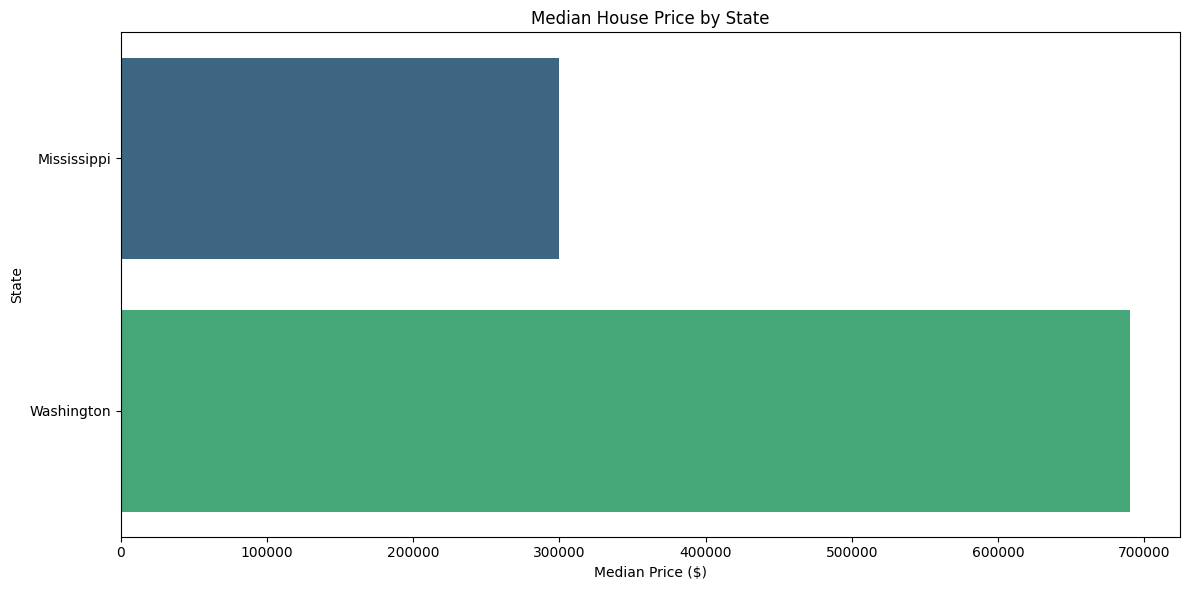

In [ ]:
# Visualizations
# ====================
plt.figure(figsize=(12,6))
sns.barplot(y=state_price.index, x=state_price.values, palette="viridis")
plt.title("Median House Price by State")
plt.xlabel("Median Price ($)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

/tmp/ipython-input-899334892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_sqft.index, x=state_sqft.values, palette="magma")


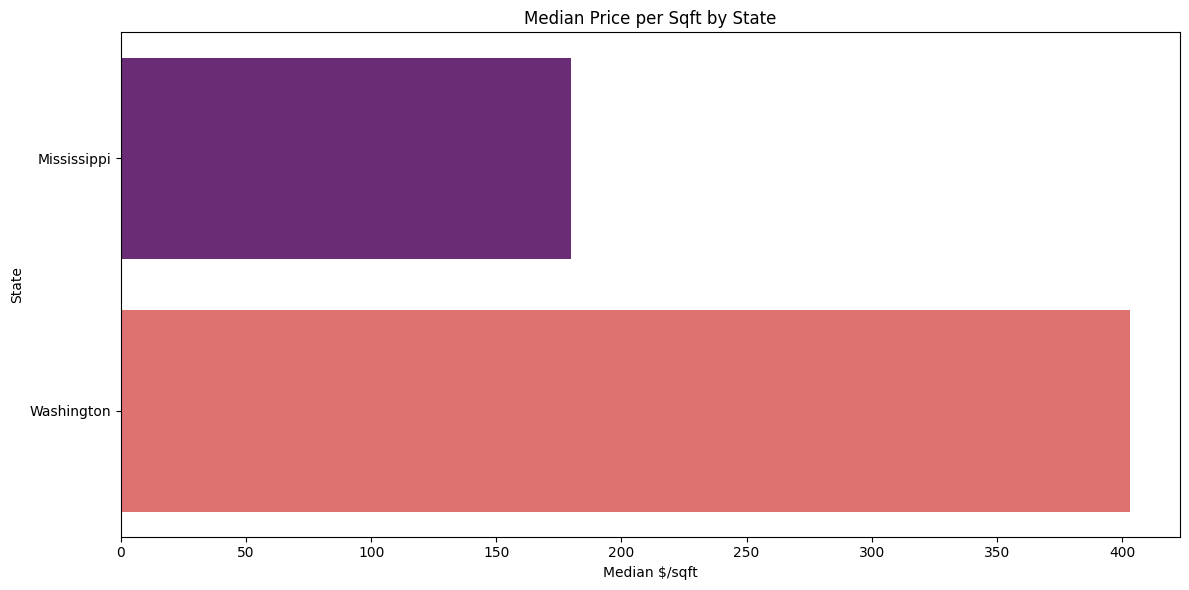

In [ ]:
# Price per sqft by state
plt.figure(figsize=(12,6))
state_sqft = df.groupby("state")["price_per_sqft"].median().sort_values()
sns.barplot(y=state_sqft.index, x=state_sqft.values, palette="magma")
plt.title("Median Price per Sqft by State")
plt.xlabel("Median $/sqft")
plt.ylabel("State")
plt.tight_layout()
plt.show()

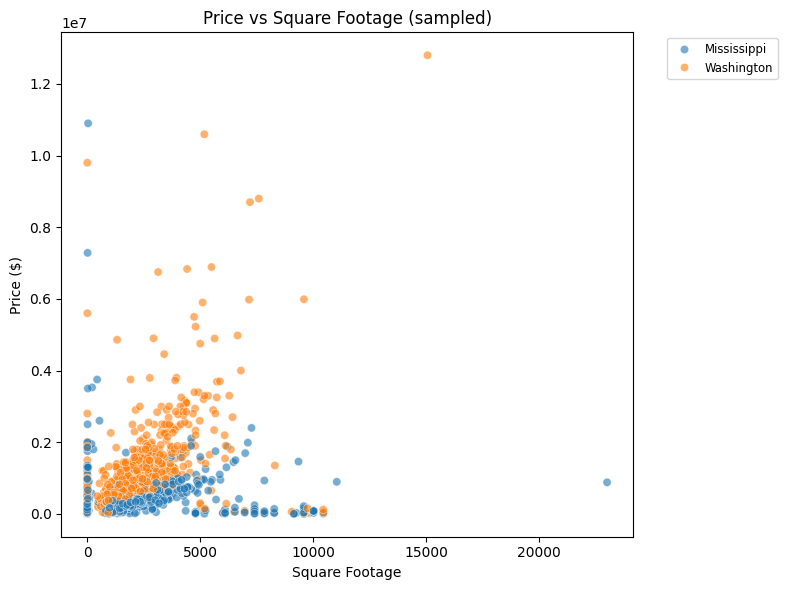

In [ ]:
# Price vs Square Footage
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(2000, random_state=42), x="square_footage", y="price", hue="state", alpha=0.6)
plt.title("Price vs Square Footage (sampled)")
plt.xlabel("Square Footage")
plt.ylabel("Price ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1378794198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bedrooms", data=df, palette="coolwarm")


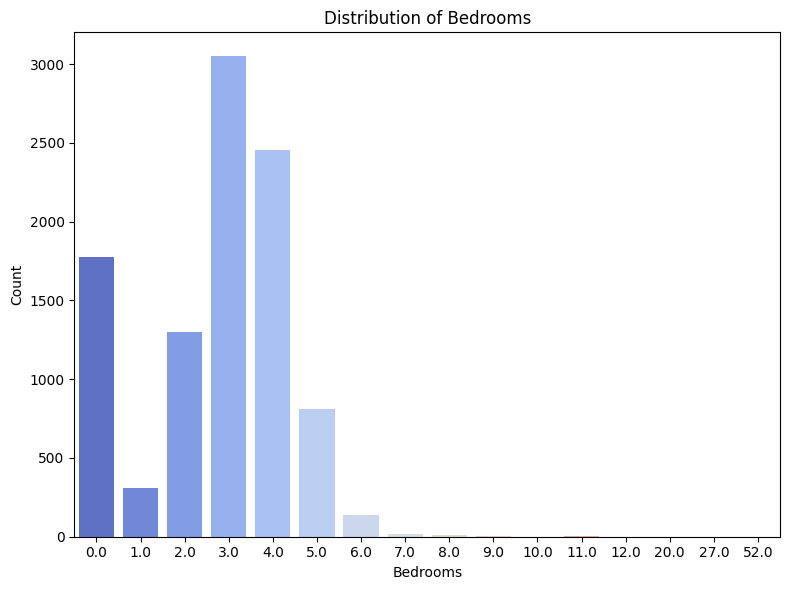

In [ ]:
# Bedrooms distribution
plt.figure(figsize=(8,6))
sns.countplot(x="bedrooms", data=df, palette="coolwarm")
plt.title("Distribution of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/tmp/ipython-input-4134615919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bathrooms", data=df, palette="Set2")


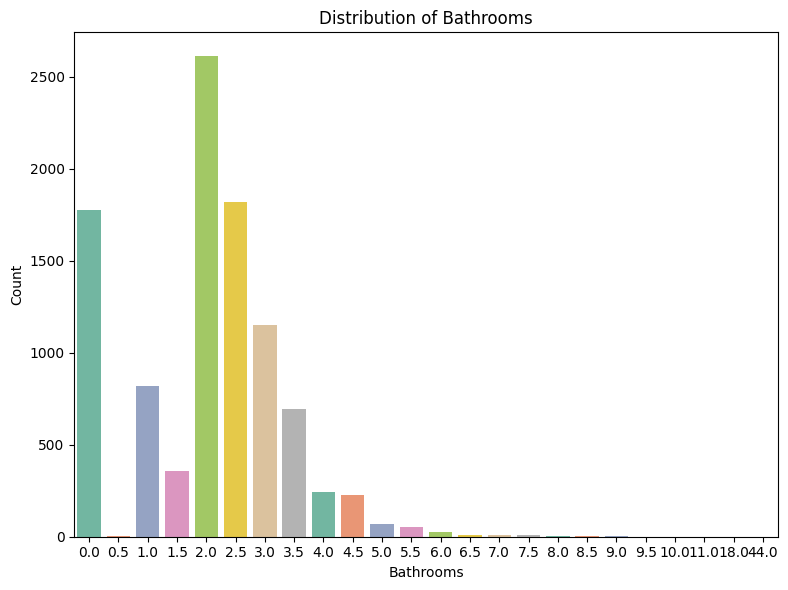

In [ ]:
# Bathrooms distribution
plt.figure(figsize=(8,6))
sns.countplot(x="bathrooms", data=df, palette="Set2")
plt.title("Distribution of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2913811360.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="year_built", y="price", ci=None, color="blue")


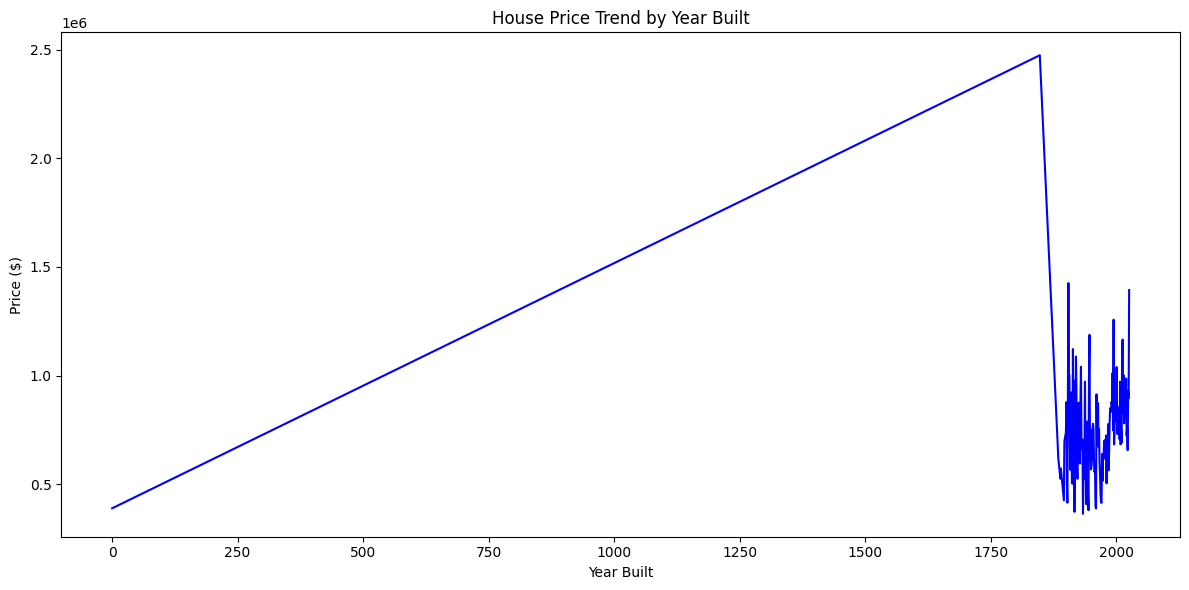

In [ ]:
# Year built vs price trend
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="year_built", y="price", ci=None, color="blue")
plt.title("House Price Trend by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1457304594.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="state", y="price", palette="Set1")


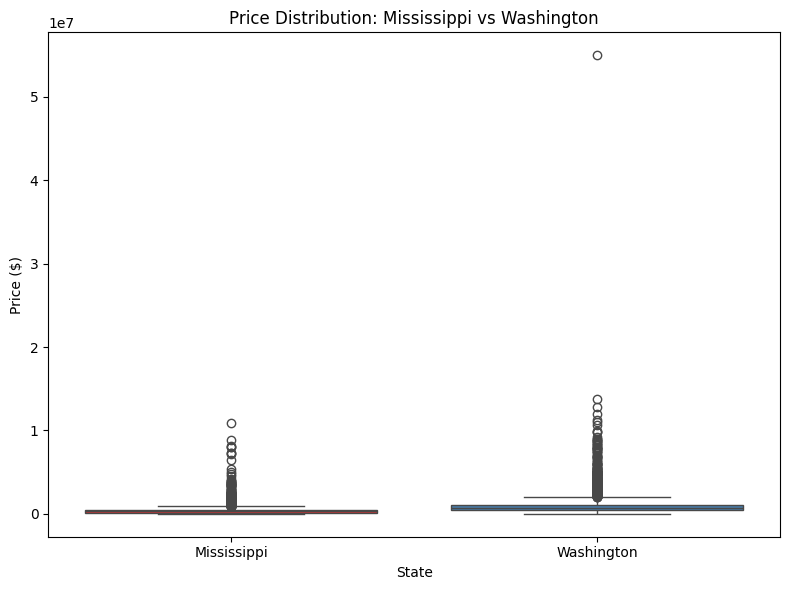

In [ ]:
# Mississippi vs Washington Comparison
# ====================
subset = df[df["state"].isin(["Mississippi", "Washington"])]
plt.figure(figsize=(8,6))
sns.boxplot(data=subset, x="state", y="price", palette="Set1")
plt.title("Price Distribution: Mississippi vs Washington")
plt.xlabel("State")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1625948696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x="state", y="price_per_sqft", palette="Set2")


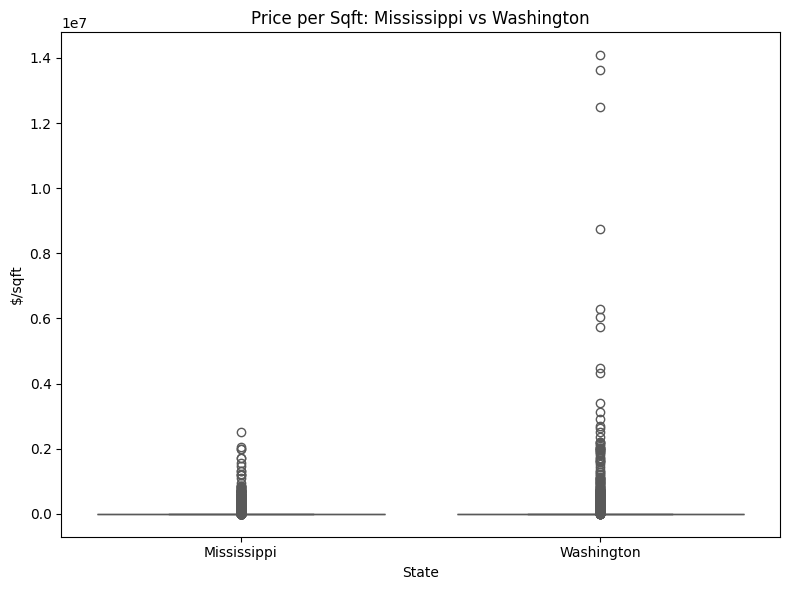

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=subset, x="state", y="price_per_sqft", palette="Set2")
plt.title("Price per Sqft: Mississippi vs Washington")
plt.xlabel("State")
plt.ylabel("$/sqft")
plt.tight_layout()
plt.show()

In [ ]:
# City-Level Analysis
# ====================
city_price = df.groupby("city")["price"].median().sort_values(ascending=False)
print("\n===== Top 10 Expensive Cities (Median Price) =====")
print(city_price.head(10))


===== Top 10 Expensive Cities (Median Price) =====
city
Hunts         55000000.0
Clyde         10995000.0
Preston        2999999.0
Purvis         2600000.0
Woodway        2400000.0
Beaux          2250000.0
Sammamish      1768000.0
Gautier        1720000.0
Ellisville     1665180.0
Bellevue       1498888.0
Name: price, dtype: float64


/tmp/ipython-input-2805766921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_price.head(15).index, x=city_price.head(15).values, palette="plasma")


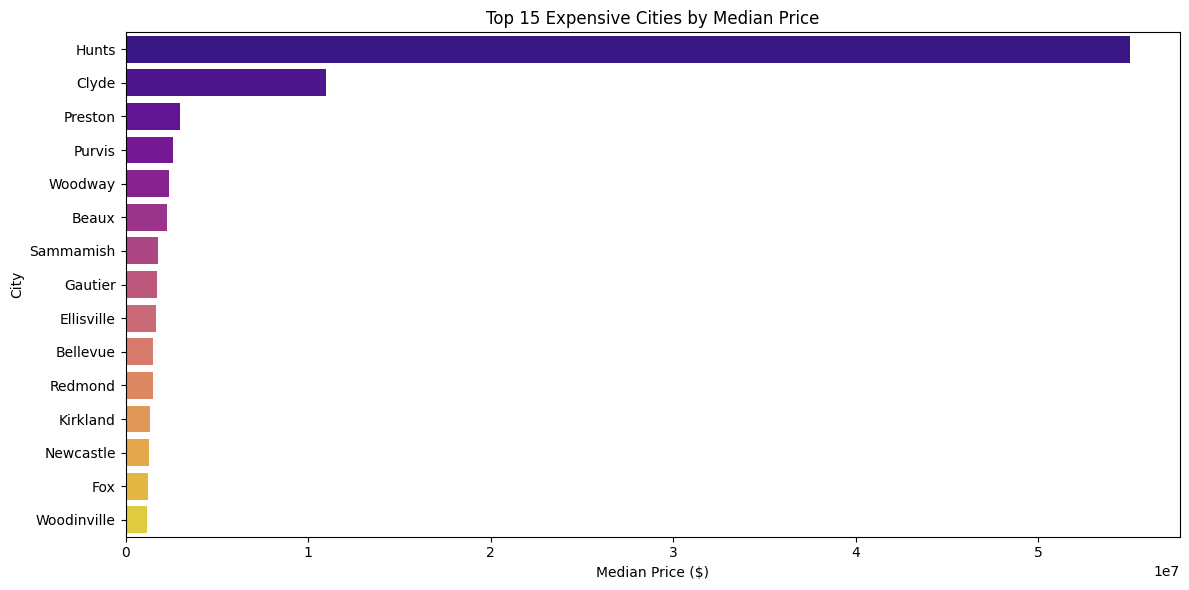

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=city_price.head(15).index, x=city_price.head(15).values, palette="plasma")
plt.title("Top 15 Expensive Cities by Median Price")
plt.xlabel("Median Price ($)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

/tmp/ipython-input-919662126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="parking", y="price", palette="coolwarm")


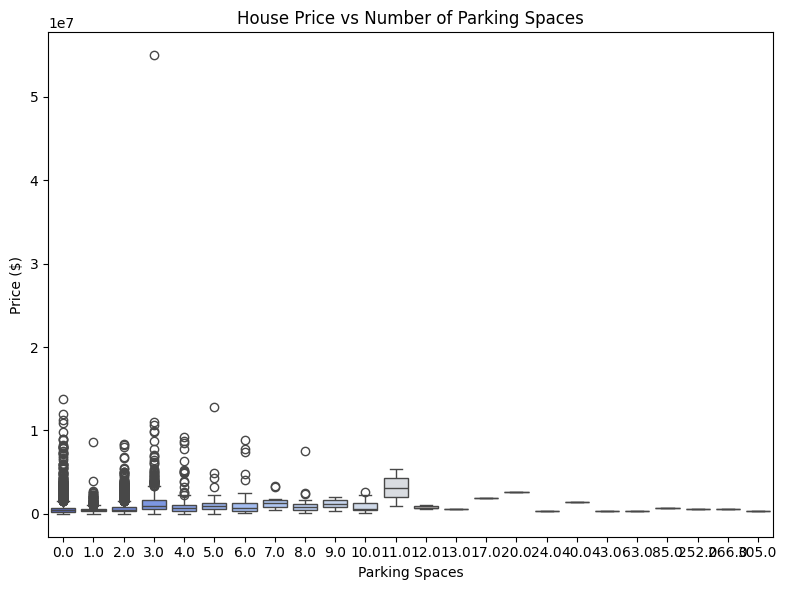

In [ ]:
# Parking Impact
# ====================
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="parking", y="price", palette="coolwarm")
plt.title("House Price vs Number of Parking Spaces")
plt.xlabel("Parking Spaces")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3648486859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="parking", y="price_per_sqft", palette="viridis")


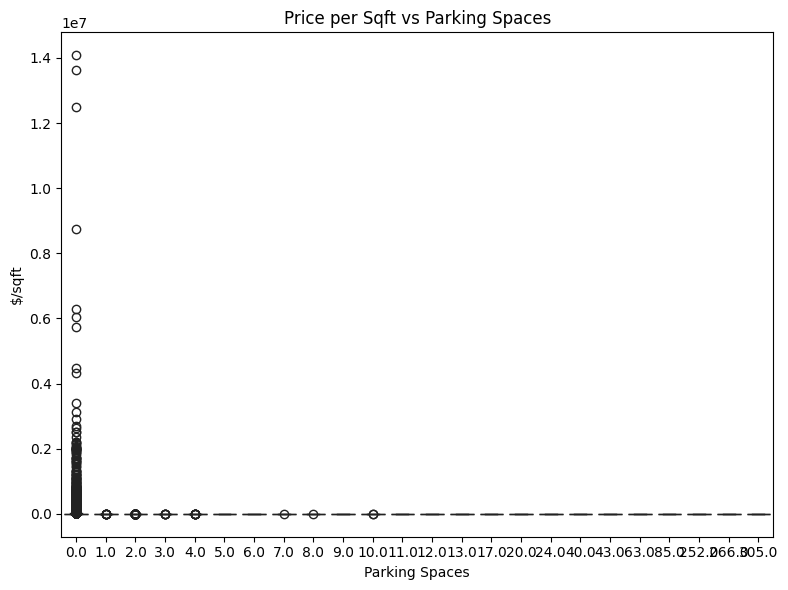

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="parking", y="price_per_sqft", palette="viridis")
plt.title("Price per Sqft vs Parking Spaces")
plt.xlabel("Parking Spaces")
plt.ylabel("$/sqft")
plt.tight_layout()
plt.show()

In [ ]:
# Mississippi vs Washington (City-Level Drilldown)
# ====================
subset_cities = df[df["state"].isin(["Mississippi", "Washington"])]

city_compare = subset_cities.groupby(["state", "city"])["price"].median().reset_index()
top_cities = city_compare.sort_values(by="price", ascending=False)

print("\n===== City Comparison in Mississippi & Washington =====")
print(top_cities.head(10))


===== City Comparison in Mississippi & Washington =====
           state        city       price
80    Washington       Hunts  55000000.0
65    Washington       Clyde  10995000.0
92    Washington     Preston   2999999.0
40   Mississippi      Purvis   2600000.0
108   Washington     Woodway   2400000.0
58    Washington       Beaux   2250000.0
98    Washington   Sammamish   1768000.0
15   Mississippi     Gautier   1720000.0
13   Mississippi  Ellisville   1665180.0
59    Washington    Bellevue   1498888.0


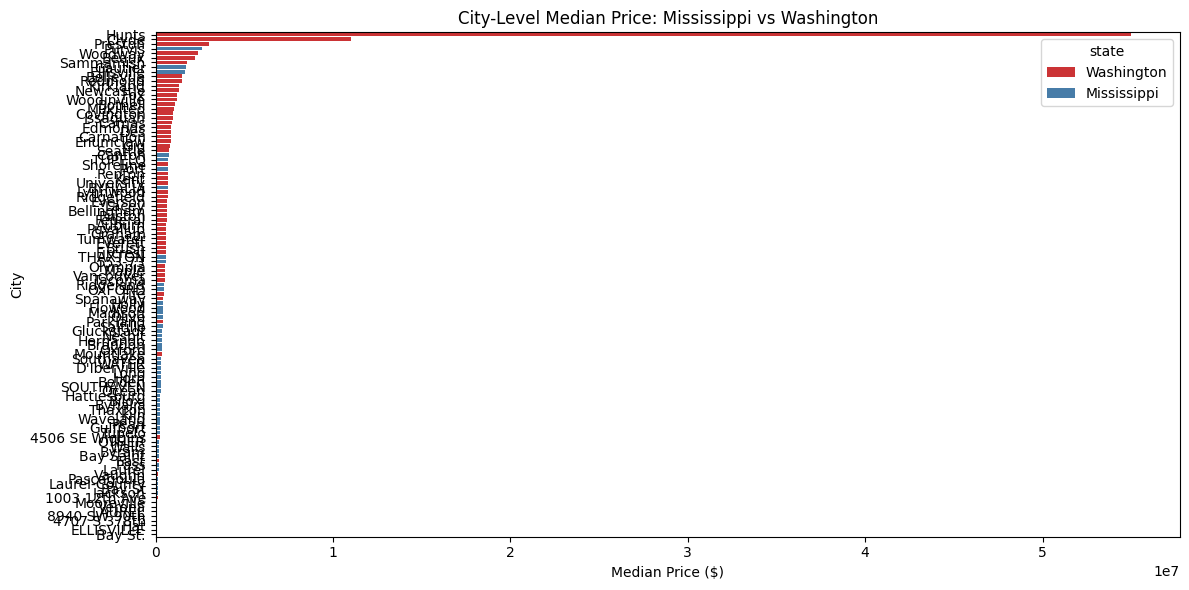

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_cities, x="price", y="city", hue="state", dodge=False, palette="Set1")
plt.title("City-Level Median Price: Mississippi vs Washington")
plt.xlabel("Median Price ($)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

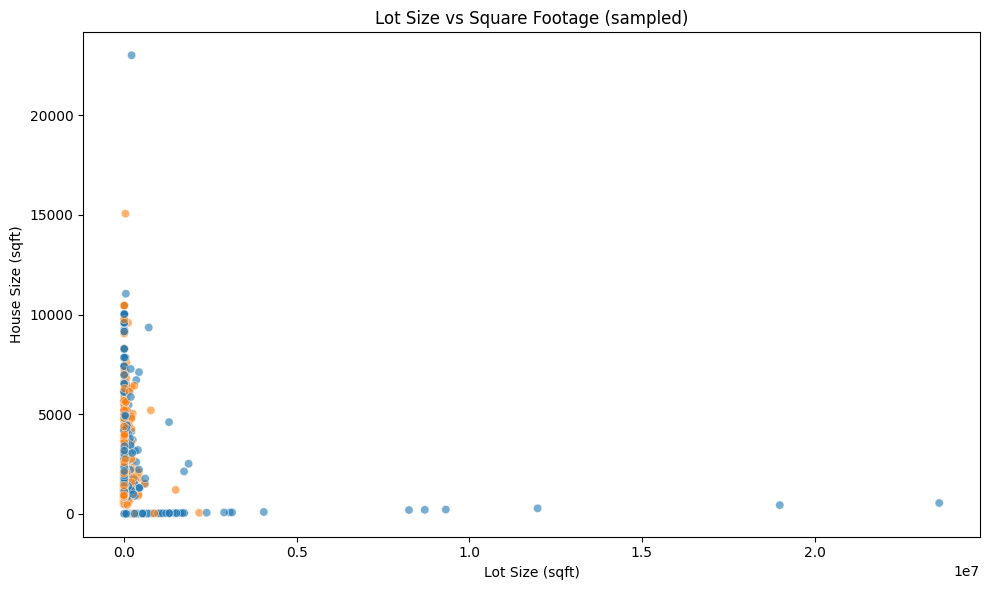

In [ ]:
# Lot Size vs Square Footage
# ====================
df["lot_utilization"] = df["square_footage"] / df["lot_size"]
df["lot_utilization"] = df["lot_utilization"].replace([float("inf"), -float("inf")], None)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(2000, random_state=42),
                x="lot_size", y="square_footage", alpha=0.6, hue="state", legend=False)
plt.title("Lot Size vs Square Footage (sampled)")
plt.xlabel("Lot Size (sqft)")
plt.ylabel("House Size (sqft)")
plt.tight_layout()
plt.show()

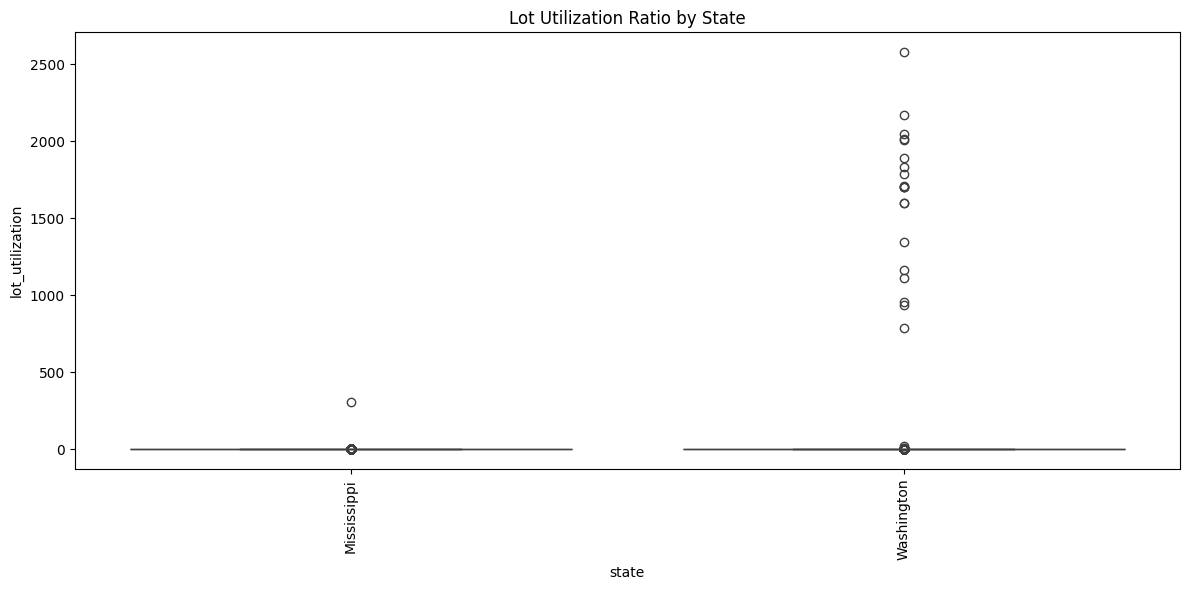

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="state", y="lot_utilization")
plt.title("Lot Utilization Ratio by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Property Type Analysis
# ====================
prop_price = df.groupby("property_type")["price"].median().sort_values()
prop_sqft = df.groupby("property_type")["price_per_sqft"].median().sort_values()

print("\n===== Median Price by Property Type =====")
print(prop_price)

print("\n===== Median Price per Sqft by Property Type =====")
print(prop_sqft)


===== Median Price by Property Type =====
property_type
Vacant land                                                  124450.0
Manufactured                                                 150000.0
Townhome (co-op)                                             247500.0
Multi-family                                                 304500.0
Parking                                                      310000.0
Condo (co-op)                                                315000.0
Condo                                                        419000.0
Townhome                                                     565000.0
Single-family                                                589900.0
Single Family Residence, 24 - Floating Home/On-Water Res     762500.0
Ranch                                                       2099000.0
Name: price, dtype: float64

===== Median Price per Sqft by Property Type =====
property_type
Multi-family                                                  112.5
Manufacture

/tmp/ipython-input-3817417884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_price.values, y=prop_price.index, palette="coolwarm")


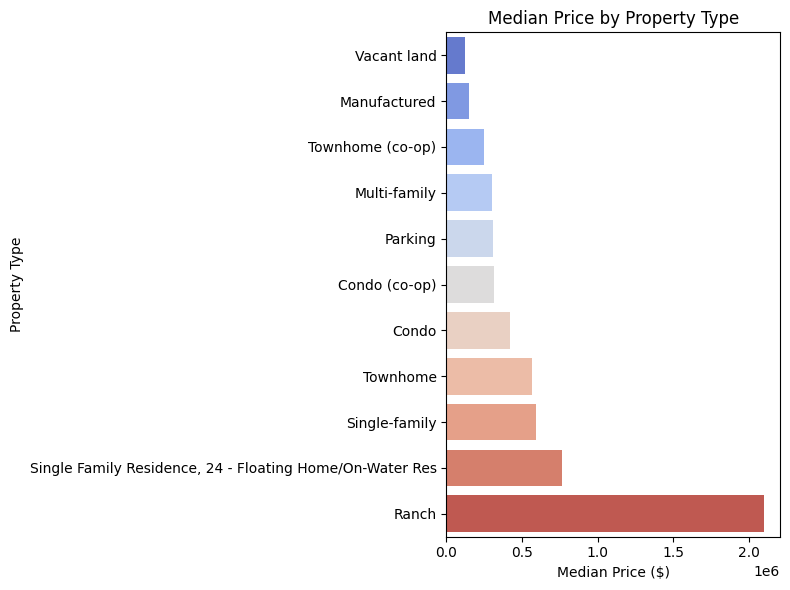

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=prop_price.values, y=prop_price.index, palette="coolwarm")
plt.title("Median Price by Property Type")
plt.xlabel("Median Price ($)")
plt.ylabel("Property Type")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3799818332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_sqft.values, y=prop_sqft.index, palette="magma")


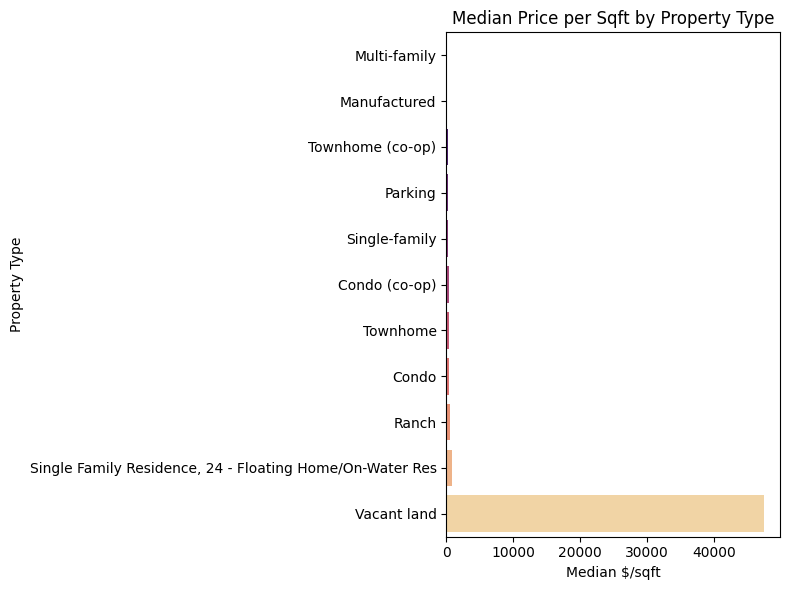

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=prop_sqft.values, y=prop_sqft.index, palette="magma")
plt.title("Median Price per Sqft by Property Type")
plt.xlabel("Median $/sqft")
plt.ylabel("Property Type")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2876027704.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_lot, x="state", y="lot_size", palette="Set2")


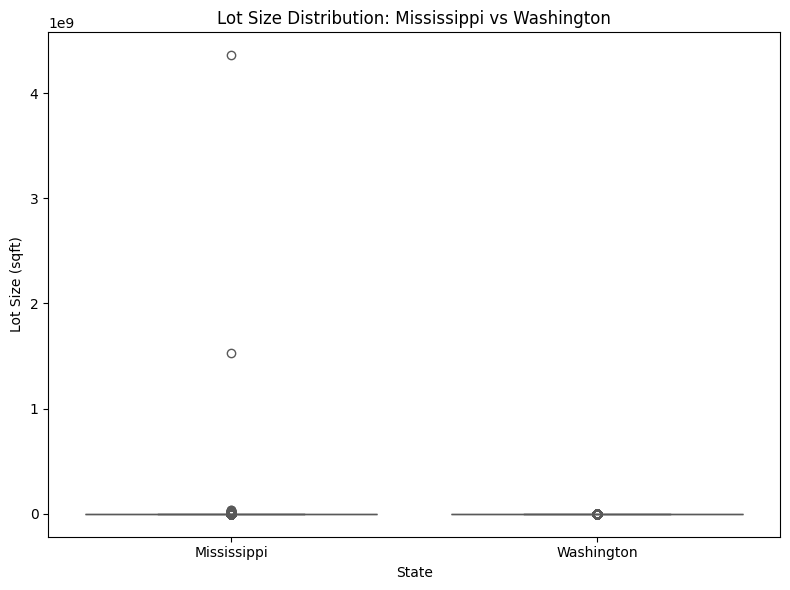

In [ ]:
# Mississippi vs Washington: Lot & Property Type
# ====================
subset_lot = df[df["state"].isin(["Mississippi", "Washington"])]

plt.figure(figsize=(8,6))
sns.boxplot(data=subset_lot, x="state", y="lot_size", palette="Set2")
plt.title("Lot Size Distribution: Mississippi vs Washington")
plt.xlabel("State")
plt.ylabel("Lot Size (sqft)")
plt.tight_layout()
plt.show()

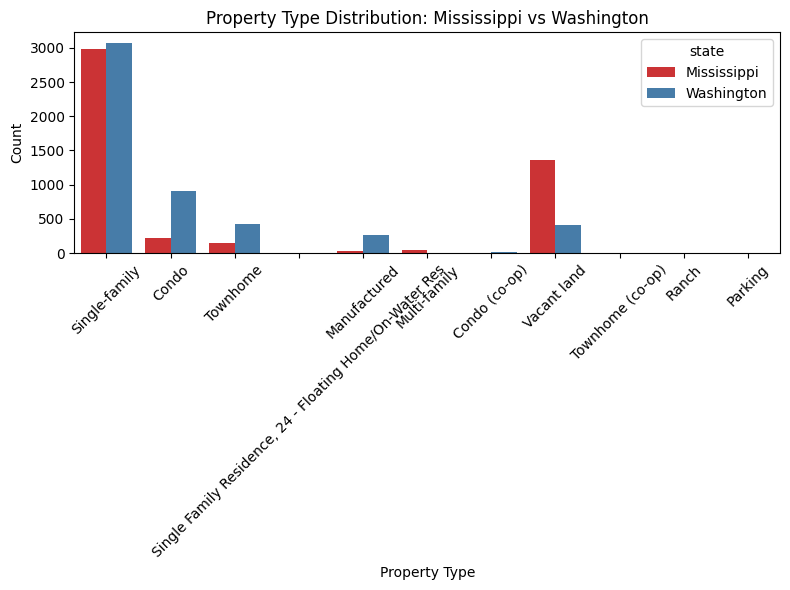

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=subset_lot, x="property_type", hue="state", palette="Set1")
plt.title("Property Type Distribution: Mississippi vs Washington")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()